In [4]:
import pandas as pd 
import numpy as np 
import  matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc

In [10]:
scores = [np.random.randint(0,100) for _ in range(100)]
print(len(scores))
print(scores)

100
[2, 11, 12, 76, 51, 4, 60, 73, 91, 51, 23, 13, 43, 12, 92, 85, 82, 73, 36, 99, 72, 53, 85, 43, 67, 28, 10, 26, 16, 88, 0, 51, 93, 15, 27, 74, 43, 16, 93, 26, 76, 22, 70, 87, 44, 42, 95, 6, 10, 74, 16, 99, 47, 29, 91, 96, 11, 7, 26, 78, 0, 0, 49, 29, 9, 83, 33, 47, 65, 43, 25, 64, 66, 81, 85, 56, 22, 54, 94, 18, 57, 86, 20, 31, 84, 97, 17, 31, 5, 89, 22, 28, 49, 64, 23, 43, 75, 50, 36, 11]


In [12]:
score_series = pd.Series(scores)
print(score_series)

0      2
1     11
2     12
3     76
4     51
      ..
95    43
96    75
97    50
98    36
99    11
Length: 100, dtype: int64


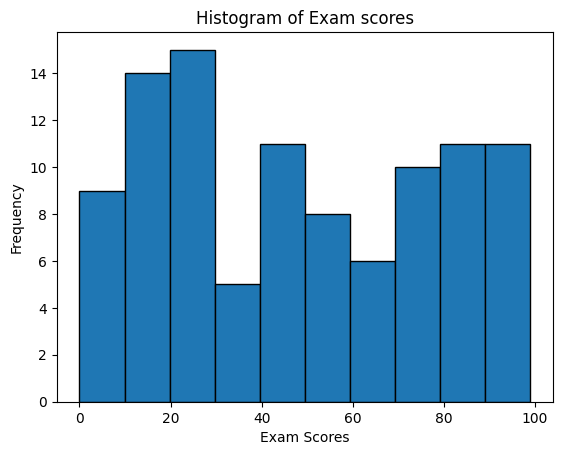

In [13]:
plt.hist(scores,bins=10, edgecolor='black')
plt.xlabel('Exam Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Exam scores')
plt.show()

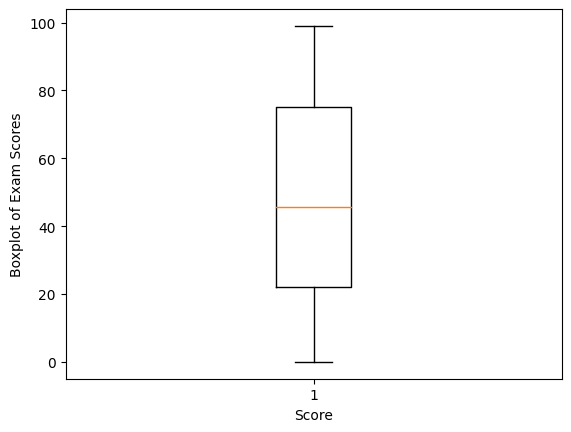

In [15]:
plt.boxplot(scores, vert=True)
plt.xlabel('Score')
plt.ylabel('Boxplot of Exam Scores')
plt.show()

In [18]:
study_hours = np.random.randint(0,10,100)
exam_scores = study_hours * 10 + np.random.normal(0,5,100)
print(len(exam_scores))

100


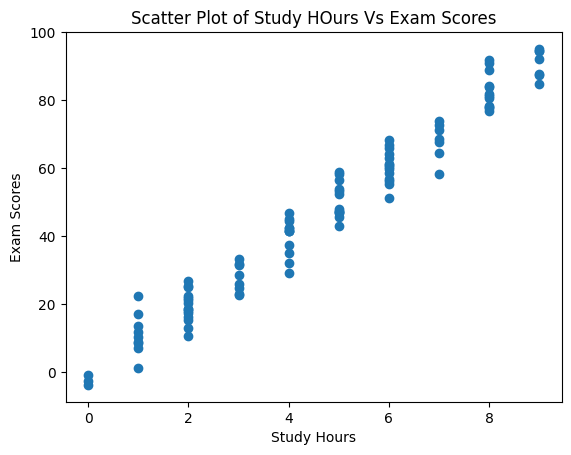

In [20]:
plt.scatter(study_hours, exam_scores)
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.title('Scatter Plot of Study HOurs Vs Exam Scores')
plt.show()

In [26]:
data = {
    'A' : [1, 2, np.nan, 4, 5],
    'B' : [5, np.nan, np.nan, 8, 10],
    'C' : [10, 9, 8, 7, 6],
    'D' : [np.nan, 2, 3, np.nan, 5]
 
}
df = pd.DataFrame(data)
df

,A,B,C,D
0,1.0,5.0,10,NaN
1,2.0,NaN,9,2.0
2,NaN,NaN,8,3.0
3,4.0,8.0,7,NaN
4,5.0,10.0,6,5.0


In [22]:
df = pd.DataFrame(data)
df

,A,B,C,D
0,1.0,5.0,10,NaN
1,2.0,NaN,9,2.0
2,NaN,NaN,8,3.0
3,4.0,8.0,7,NaN
4,5.0,10.0,6,5.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       3 non-null      float64
 2   C       5 non-null      int64  
 3   D       3 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 292.0 bytes


In [24]:
df.describe()

,A,B,C,D
count,4.000000,3.000000,5.000000,3.000000
mean,3.000000,7.666667,8.000000,3.333333
std,1.825742,2.516611,1.581139,1.527525
min,1.000000,5.000000,6.000000,2.000000
25%,1.750000,6.500000,7.000000,2.500000
50%,3.000000,8.000000,8.000000,3.000000
75%,4.250000,9.000000,9.000000,4.000000
max,5.000000,10.000000,10.000000,5.000000


In [25]:
df.isnull().sum()

A    1
B    2
C    0
D    2
dtype: int64

In [27]:
data = {
    'A' : [1, 2, np.nan, 4, 5],
    'B' : [5, np.nan, np.nan, 8, 10],
    'C' : [10, 9, 8, 7, 6],
    'D' : [np.nan, 2, 3, np.nan, 5]
 
}
df = pd.DataFrame(data)
df

,A,B,C,D
0,1.0,5.0,10,NaN
1,2.0,NaN,9,2.0
2,NaN,NaN,8,3.0
3,4.0,8.0,7,NaN
4,5.0,10.0,6,5.0


In [29]:
df_dropped_rows = df.dropna()
print(df_dropped_rows)

     A     B  C    D
4  5.0  10.0  6  5.0


In [31]:
df_dropped_colums_values = df.dropna(axis=1)
print(df_dropped_colums_values)

    C
0  10
1   9
2   8
3   7
4   6


In [32]:
df_filled_0 = df.fillna(0)
print(df_filled_0)

     A     B   C    D
0  1.0   5.0  10  0.0
1  2.0   0.0   9  2.0
2  0.0   0.0   8  3.0
3  4.0   8.0   7  0.0
4  5.0  10.0   6  5.0


In [33]:
df

,A,B,C,D
0,1.0,5.0,10,NaN
1,2.0,NaN,9,2.0
2,NaN,NaN,8,3.0
3,4.0,8.0,7,NaN
4,5.0,10.0,6,5.0


In [34]:
df_Mean = df.fillna(df.mean())
print(df_Mean)

     A          B   C         D
0  1.0   5.000000  10  3.333333
1  2.0   7.666667   9  2.000000
2  3.0   7.666667   8  3.000000
3  4.0   8.000000   7  3.333333
4  5.0  10.000000   6  5.000000


In [37]:
df_median = df.fillna(df.median())
print(df_median)

     A     B   C    D
0  1.0   5.0  10  3.0
1  2.0   8.0   9  2.0
2  3.0   8.0   8  3.0
3  4.0   8.0   7  3.0
4  5.0  10.0   6  5.0


In [38]:
df_forward_value = df.fillna(method='ffill')
print(df_forward_value)

     A     B   C    D
0  1.0   5.0  10  NaN
1  2.0   5.0   9  2.0
2  2.0   5.0   8  3.0
3  4.0   8.0   7  3.0
4  5.0  10.0   6  5.0


C:\Users\Manikandan\AppData\Local\Temp\ipykernel_16112\1652460915.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_forward_value = df.fillna(method='ffill')


In [39]:
df_backward_value = df.fillna(method='bfill')
print(df_backward_value)

     A     B   C    D
0  1.0   5.0  10  2.0
1  2.0   8.0   9  2.0
2  4.0   8.0   8  3.0
3  4.0   8.0   7  5.0
4  5.0  10.0   6  5.0


C:\Users\Manikandan\AppData\Local\Temp\ipykernel_16112\2924055510.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_backward_value = df.fillna(method='bfill')


In [59]:
data  = {
    
    'value' : [10,12,13,15,16,18,19,200]
    
}

df = pd.DataFrame(data)

In [60]:
df

,value
0,10
1,12
2,13
3,15
4,16
5,18
6,19
7,200


In [61]:
Q1 = df['value'].quantile(0.25)
Q2 = df['value'].quantile(0.75)

In [62]:
print(Q1)
print(Q2)

12.75
18.25


In [65]:
IQR = Q2-Q1
print(IQR)

lower_bound = Q1 - 1.5 * (IQR)
print(lower_bound)
upper_bound = Q2 + 1.5 * (IQR)
print(upper_bound)
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]

print('outliers:\n', outliers)

5.5
4.5
26.5
outliers:
    value
7    200


In [57]:
print(df)
df['value'] = np.where(df['value'] > upper_bound, upper_bound, df['value'])
df['value'] = np.where(df['value'] < lower_bound, lower_bound, df['value'])
print('Data After cappoing:\n', df)


   value
0   10.0
1   12.0
2   13.0
3   15.0
4   16.0
5   18.0
6   19.0
7   26.5
Data After cappoing:
    value
0   10.0
1   12.0
2   13.0
3   15.0
4   16.0
5   18.0
6   19.0
7   26.5


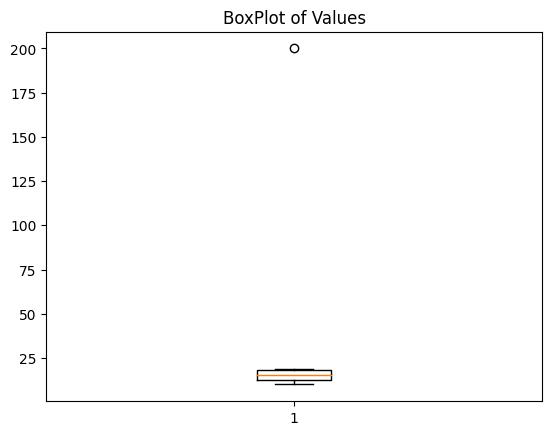

In [66]:
plt.boxplot(df['value'])
plt.title('BoxPlot of Values')
plt.show()

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

In [67]:
data = {
    'features1' : [1,2,3,4,5],
    'features2' : [2,4,5,8,10],
    'features3' : [5,4,3,2,1]
}

In [68]:
df = pd.DataFrame(data)

In [70]:
correlation_Matrix = df.corr()
print('Correlation_Matrix:\n', correlation_Matrix)

Correlation_Matrix:
            features1  features2  features3
features1   1.000000   0.990148  -1.000000
features2   0.990148   1.000000  -0.990148
features3  -1.000000  -0.990148   1.000000


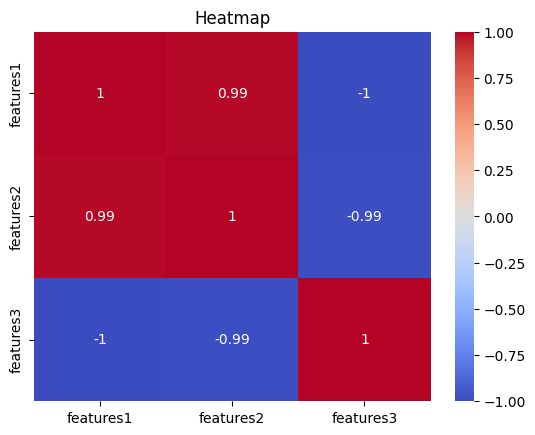

In [71]:
sns.heatmap(correlation_Matrix,annot=True,cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [76]:
x = df[['features1','features2','features3']]
x

,features1,features2,features3
0,1,2,5
1,2,4,4
2,3,5,3
3,4,8,2
4,5,10,1


In [79]:
vif_data = pd.DataFrame()
vif_data

""


In [87]:
vif_data['feature'] = x.columns
vif_data
x.values

array([[ 1,  2,  5],
       [ 2,  4,  4],
       [ 3,  5,  3],
       [ 4,  8,  2],
       [ 5, 10,  1]], dtype=int64)

In [88]:
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

     feature         VIF
0  features1  267.590278
1  features2   51.000000
2  features3    1.756944
